<a href="https://colab.research.google.com/github/IlyaKo4atkov/MyProjects/blob/main/Models_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача 1. Обнаружение фальшивых новостей
Фальшивые новости — это ложная информация, распространяемая через социальные сети и другие сетевые СМИ для достижения политических или идеологических целей.

Моя  задача -  используя библиотеку sklearn построить модель классического машинного обучения, которая может с высокой точностью более 90% определять, является ли новость реальной (REAL） или фальшивой（FAKE).

В проекте был использован TfidfVectorizer для извлечения признаков из текстовых данных и PassiveAggressiveClassifier.

In [ ]:
from requests import get
response = get("https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv")
with open('fake_news.csv', 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

In [ ]:
#Импортируем необходимые библиотеки для дальнейшего обучения модели
from sklearn.model_selection import train_test_split #это библиотека для разделения данных на обучающую и тестовую выборки
from sklearn.feature_extraction.text import TfidfVectorizer # данная библиотека используется для преобразования текстовых данных в числовые значениия
from sklearn.linear_model import PassiveAggressiveClassifier # данная библиотека используется для создания и обучения модели с помощью классификатора
from sklearn.metrics import accuracy_score, confusion_matrix # библиотека используется для оценки точности модели и построения матрицы ошибок
import matplotlib.pyplot as plt # библиотека для визуализации данных
import seaborn as sns # визуализация данных
import pandas as pd # для работы с формато DateFrame
df = pd.read_csv('fake_news.csv') # Загрузка данных

#Разделение данных на признаки и метки. В данном случае мы разделяем данные на признаки (х) и метки (у). Где х - содержит текст новостей, а у - содержат метки (в данном случае "FAKE" и "REAL", исходя из файла fake_news)
x = df['text']
y = df['label']

#Разделение данных на обучающую и тестовую выборки
#Идет разделение данных на обучающую и тестовую выборки. 80% данных используется  для обучения (получили в результате 1 - test_size), а 20% - для тестирования (test_size = 0.2)
#В качестве воспроизводимости результатов, используется значение random_state = 7, как наиболее оптимальное.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

#Преобразование текстовых данных в числовые признаки
#Используется библиотке TfidfVectorizer для преобразования текстовых данных в числовые признаки.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) # метод stop_words удаляет общие английские слова, метод max_df игнорирует слова, которые встречаются в более чем 70% документов.
tfidf_train = tfidf_vectorizer.fit_transform(x_train) #применяем векторизатор к обучающей выборке
tfidf_test = tfidf_vectorizer.transform(x_test) # Применяем векторизатор к тестовой выборке

#Создание и обучение модели
#В этой части кода идет создание модели  с помощью библиотеки "PassiveAggressiveClassifier", где дальше проводится обучение на обучающих данных.
pac = PassiveAggressiveClassifier(max_iter=50) # max_iter задает максимальное количество итераций для обучения. 50 было выбрано, потому что это среднее значения количества итераций. Если необходиом увеличить количество итераций, то модель будет более точной , но в данном случает 50 достаточно.
pac.fit(tfidf_train, y_train)

#Предсказание на тестовых данных
y_pred = pac.predict(tfidf_test) # Используется обученная модель для предсказания меток на тестовых данных.

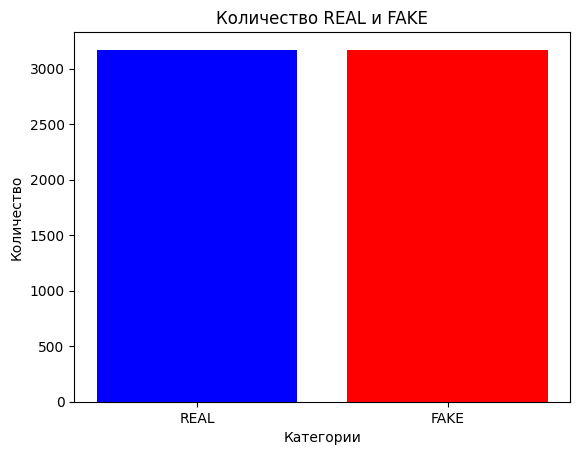

In [ ]:
#Выведем количество FAKE и REAL новостей
# Подсчет количества вхождений слов 'FAKE' и 'REAL'
fake_count = df['label'].value_counts().get('FAKE', 0)
real_count = df['label'].value_counts().get('REAL', 0)
categories = ['REAL', 'FAKE']
values = [fake_count, real_count]
plt.bar(categories, values, color=['blue', 'red'])
plt.title('Количество REAL и FAKE')
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.show()

Точность: 92.82%


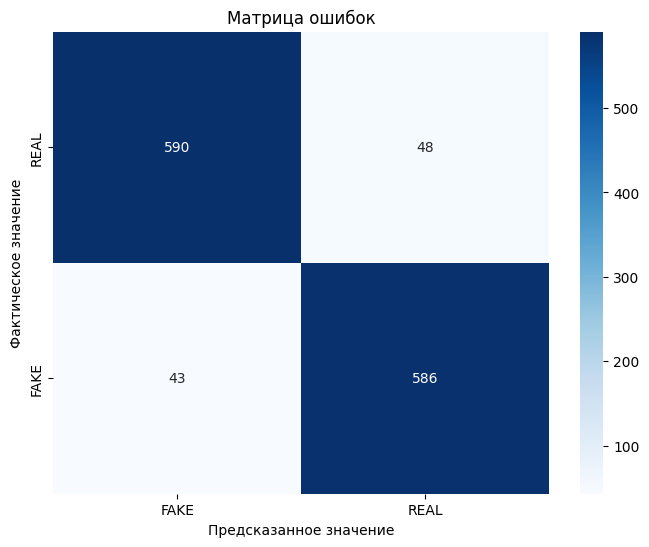

In [ ]:
# Оценка точности модели
score = accuracy_score(y_test, y_pred)
print(f'Точность: {score * 100:.2f}%') # Проводится оценка точности модели, поэтапно сравнивается предсказанные метки с фактическими метками("FAKE" и "REAL").

# Построение матрицы ошибок
conf_mat = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
# Построение матрицы ошибок, которая показывает, сколько раз модель правильно и неправильно классифицировала данные. Далее проводится визуализация матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['REAL', 'FAKE'])
plt.xlabel('Предсказанное значение')
plt.ylabel('Фактическое значение')
plt.title('Матрица ошибок')
plt.show()

Вывод:
Как видно из матрицы ошибок предсказанное значение FAKE и REAL новостей, приближено к фактическому, и разницу составляем в несколько единиц. Это очень хороший результат, уоторый удовлетворяет условию задачи >90%

# Задача 2. Обнаружение болезни паркинсона с помощью XGBoost
Моя задача с помощью Data Science предсказать заболевание паркинсона на ранней стадии, используя алгоритм машинного обучения XGBoost и библиотеку sklearn для нормализации признаков.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:26:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Точность модели на тестовой выборке: 94.87


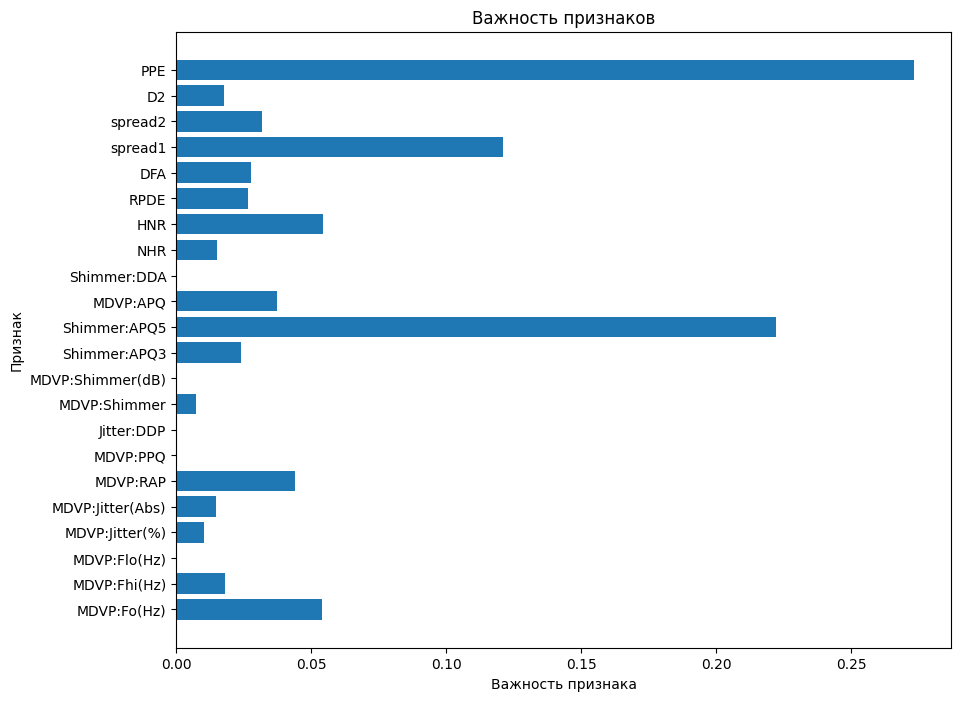

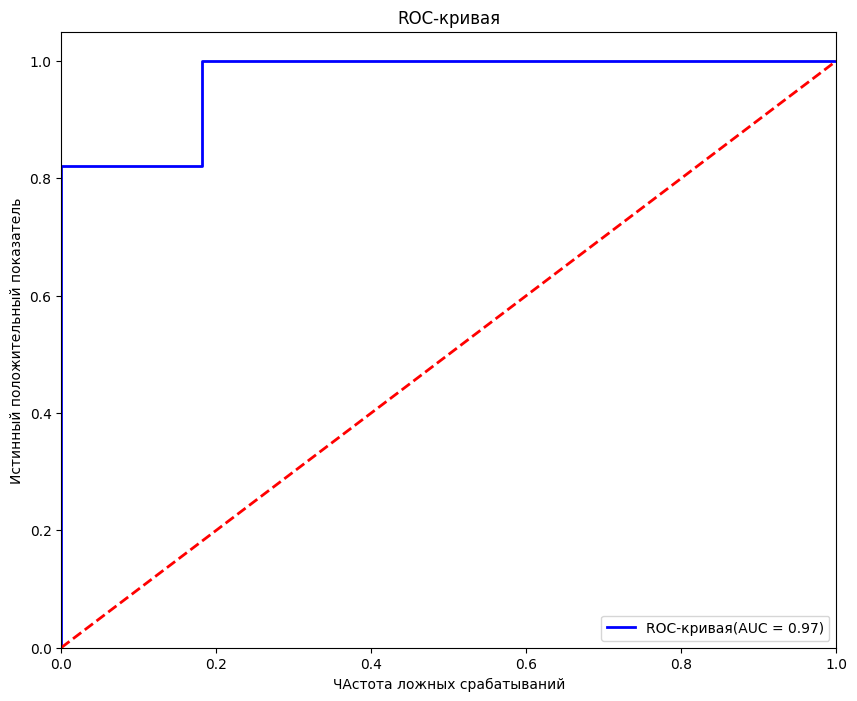

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Шаг 1: Загрузка данных
url = "https://storage.yandexcloud.net/academy.ai/practica/parkinsons.data"
data = pd.read_csv(url)

# Шаг 2: Предобработка данных
# Удалим столбец 'name', так как он не является числовым признаком и не нужен для обучения модели. Этот шаг выполнять не обязательно.
data = data.drop(columns=['name'])

# Разделим данные на признаки (X) и метки (y)
X = data.drop(columns=['status'])
y = data['status']

# Шаг 3: Разделение данных на обучающую и тестовую выборки
# Используем функцию train_test_split для разделения данных на обучающую и тестовую выборки. 80% данных идут на обучение, 20% - на тестирование.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Шаг 4: Нормализация признаков
scaler = StandardScaler() #Создается объект для нормализации данных.
X_train_scaled = scaler.fit_transform(X_train) # Применяется нормализация к обучающей выборке
X_test_scaled = scaler.transform(X_test) # Применяется нормализация к тестовой выборке

# Шаг 5: Обучение модели XGBoost
# Происходит процесс обучения на нормализованных данных обучающей выборки
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)

# Шаг 6: Оценка точности модели на тестовой выборке
# Проввдится прогноз метки для тестовой выборки.
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred) # Идет вычисление точности модели

print(f"Точность модели на тестовой выборке: {accuracy * 100:.2f}") # Вывод точности на тестовой выборке
#Построение графика важности признаков. Эта гистограмма позволяет легко понять, какие признаки наиболее важны для модели.
plt.figure(figsize=(10, 8))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков')
plt.show()

#Построение ROC-кривой
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Прогнозируем вероятности классов для тестовой выборки.
# Вычисляем значения для ROC-кривой с помощью функции 'roc_curve'. ROC-кривая используется для оценки качества бинарных классификаторов. Эта зависимость позволяет визуализировать соотношение между чувствительностью и специфичностью при различных порогах классификации. Данная модель очень хорошо подходит для нашего алгоритма обучения.
# Вычисляе мплощадь под кривой (AUC) с помощью функции 'auc'.
# Строим ROC-кривую и добавляем легенду
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label = f'ROC-кривая(AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('ЧАстота ложных срабатываний')
plt.ylabel('Истинный положительный показатель')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

# Этот код выполняет полный цикл машинного обучения : от загрузки и предобработки данных до обучения модели, оценки ее точности и визуализации результатов.

Вывод: Итак, предсказать заболевание паркинсона на ранней стадии, используя алгоритм обучения XGBoost с точностью 94.87 %. С помощью инструментов визуализации была построена модель важности признаков, которые указаны в DataFrame (на основании этих данных и была проведена точность модели). С помощью визуализатора ROC-кривой , был определен порог классификации модели.


# Задача №3. Обнаружения мошеннических транзакций.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


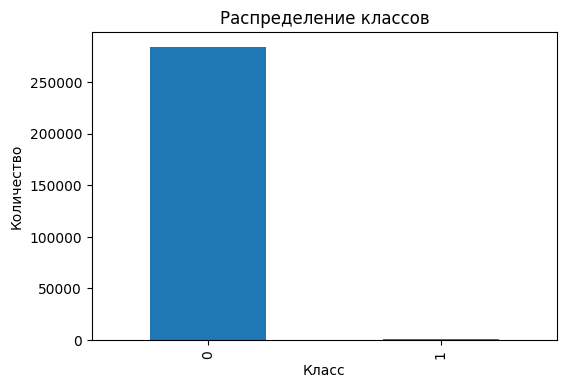

Логистическая регрессия
[[56851    13]
 [   34    64]]


In [ ]:
#Импортируются необходимые библиотеки
import pandas as pd # для работы с данными
import matplotlib.pyplot as plt #для визуализации
from sklearn.model_selection import train_test_split #для машинного обучения
from sklearn.preprocessing import StandardScaler
from google.colab import drive # для работы с google диском
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
drive.mount('/content/drive')

# Файл должен находится в корневом каталоге Google Диска.
path = "/content/drive/My Drive/creditcard.csv"
df = pd.read_csv(path)

# Визуализаця распределение классов в исходной DateFrame. Построение гистограммы для визуализации распределения классов (мошеннические = 1 и немошеннические = 0 транзакции)
plt.figure(figsize=(6, 4))
df['Class'].value_counts().plot(kind='bar')
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

X = df.drop('Class', axis=1)
y = df['Class']
# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Разделение данных на обучающую и тестирующую выборку. Данные распределяются на признаки (Х) и целевую переменную (Y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


#Обучение модели логистической регрессии
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Проведение предсказания на тестовой выборки
y_pred_log_reg = log_reg.predict(X_test)
# Оценка модели
print('Логистическая регрессия')
print(confusion_matrix(y_test, y_pred_log_reg))



Random Forest:
[[56859     5]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



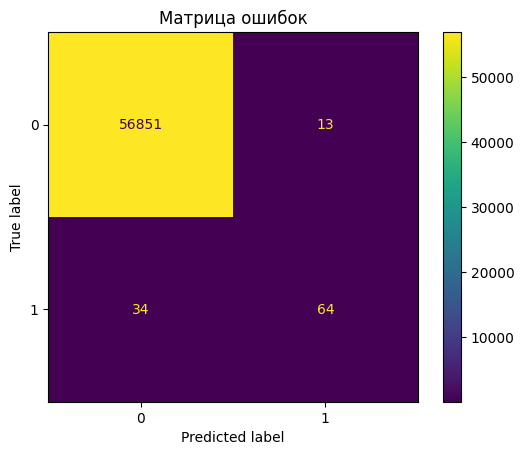

In [ ]:

# Обучение модели Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42) # проводим 100 оценок  на 42 случайных состояния
rf_clf.fit(X_train, y_train)

#Предсказание на тестовой выборке
y_pred_rf = rf_clf.predict(X_test)

#Оценка модели
print('Random Forest:')
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

#Визуализация матрицы ошибок для логарифмической регресси
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_reg)
plt.title('Матрица ошибок')
plt.show()


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5697/5697 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9962 - loss: 0.0260 - val_accuracy: 0.9993 - val_loss: 0.0035
Epoch 2/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9993 - val_loss: 0.0031
Epoch 3/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 4/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9995 - val_loss: 0.0032
Epoch 5/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 6/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9991 - val_loss: 0.0039
Epoch 7/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9995 - val_loss: 0.0036
Epoch 8/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9996 - loss: 0.0015 - val

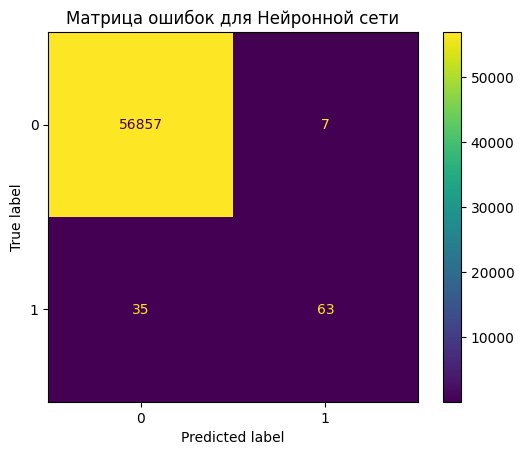

In [ ]:

#Создание модели нейронной сети
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Обучение модели
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
# Оценка модели
y_pred_nn = (model.predict(X_test) > 0.5).astype('int32')

print('Нейронная сеть:')
print(confusion_matrix(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

#Визуализация матрицы ошибок для нейронной сети
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nn)
plt.title('Матрица ошибок для Нейронной сети')
plt.show()



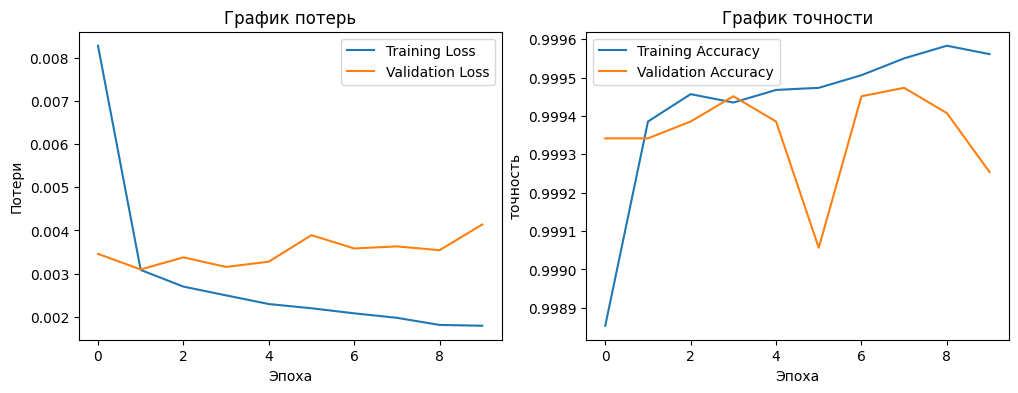

In [ ]:
#График обучения (loss and accuracy) для нейронной сети
plt.figure(figsize=(12, 4))

#График потерь (loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('График потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()

#Графие точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точность обучения')
plt.plot(history.history['val_accuracy'], label='Точность вадидационных данных')
plt.title('График точности')
plt.xlabel('Эпоха')
plt.ylabel('точность')
plt.legend()
plt.show()

Вывод: Теперь когда у нас есть результаты для всех трех моделей, мы можем сравнить их по метрикам, таким как точность, полнота и F1-score, чтобы определить, какая модель лучше всего подходить для обнаружения мошеннических транзакций. Как видно из каждого блока кода, модели Нейронной сети и Логарифмической модели обучились с одинаковой точностью, чем доказываю матрицы ошибок обоих методов. Что касаемо потерей и точностей моделей, то на каждой эпохе потери минимизируются и к концу эпохи стабилизируются (в первые 2 эпохи значение потреь падает от 0.008 до 0.003). Что касается проверки данных (Validation Loss), то она остается примерно на постояном уровне, заметны небольшие колебания.
График точности показывает следующие результаты: Точность обучения растет с увеличением эпох, а точность проверки данных имеет нестабильный уровень, на начальном уровне эпох, уровень держится на значении 0.9994, далее к 5 эпохе он резко понижается до значения 0.9991 и к 6-ой эпохе он снова возобновляется до значения 0.9994. Что бы избежать данной ситуации, необходимо увеличить количество эпох, тогда данные будут более структурированы.